In [14]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [18]:
file = '/content/drive/MyDrive/Colab Notebooks/blues.00000.wav'

<br><br>
## Waveform

Signal array size: 661794




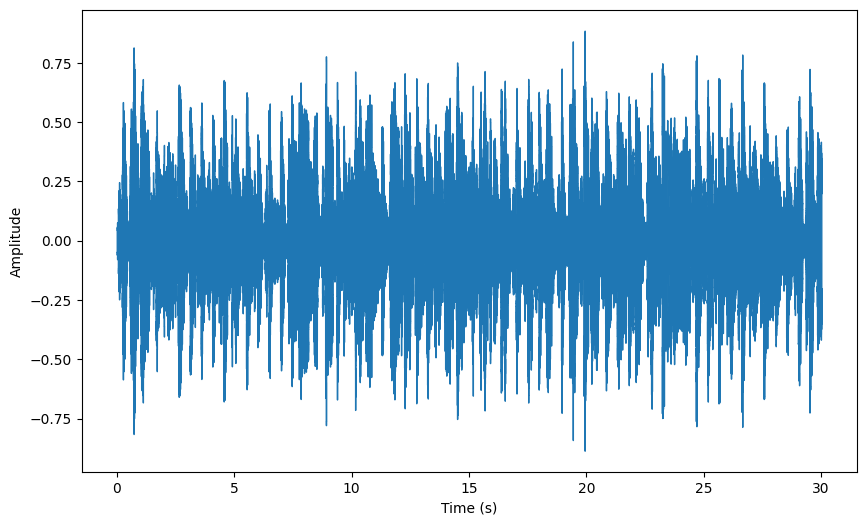

In [48]:
signal, sr = librosa.load(file, sr=22050)  # sr * T -> 22050 * 30sec

# signal = 1D numpy array
# signal array could have more than 22050 * 30 = 661,500 values
# sr = sample_rate

print(f"Signal array size: {len(signal)}\n\n")

# Visualizing waveform
plt.figure(figsize=(10, 6))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

<br><br>
## FFT ===> Spectrum


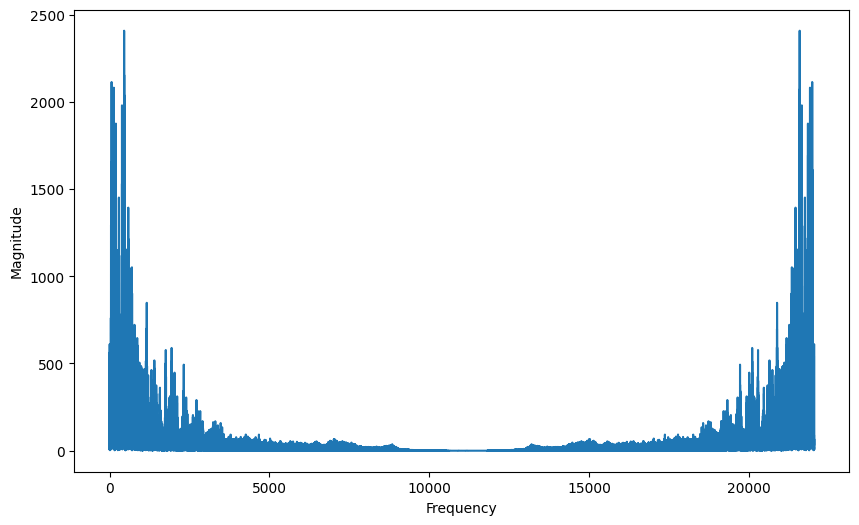

In [51]:
fft = np.fft.fft(signal)

# Getting the magnitude
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

plt.figure(figsize=(10, 6))
plt.plot(frequency, magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

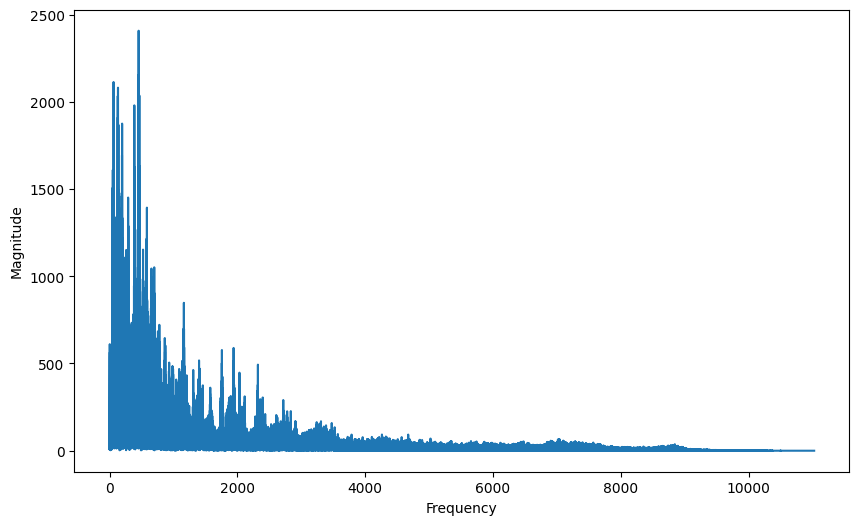

In [53]:
# Getting the first-half of the chart
left_frequency = frequency[:int(len(frequency) / 2)]
left_magnitude = magnitude[:int(len(magnitude) / 2)]

plt.figure(figsize=(10, 6))
plt.plot(left_frequency, left_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

<br><br>
## STFT ===> Spectrum

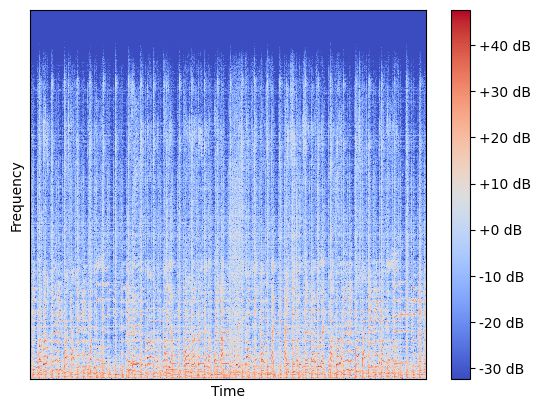

In [45]:
n_fft = 2048  # sample_amount
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.show()

<br><br>
## MFCCs


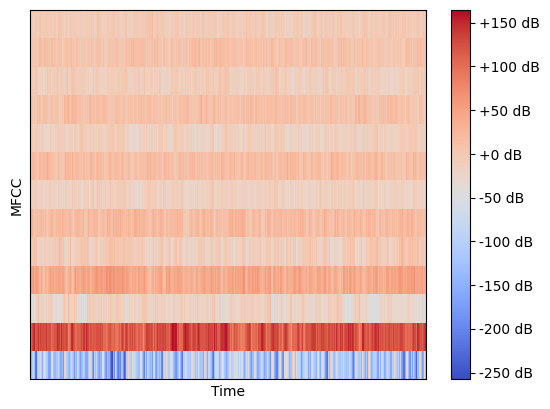

In [44]:
n_mfcc = 13
signal_dict = {"y": signal, "sr": sr, "n_mfcc": n_mfcc, "hop_length": hop_length, "n_fft": n_fft}
MFFCs = librosa.feature.mfcc(**signal_dict)

librosa.display.specshow(MFFCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar(format="%+2.0f dB")
plt.show()